# Review Operasi Matriks Dasar

Operasi dasar matriks adalah fondasi penting dalam aljabar linear yang banyak digunakan dalam machine learning. Notebook ini akan membahas operasi-operasi matriks dasar yang sering digunakan dalam algoritma machine learning.

## Operasi Dasar Matriks

Sebelum menjelaskan operasi-operasi matriks, mari kita ingat bahwa matriks dengan ukuran m×n terdiri dari m baris dan n kolom. Beberapa operasi matriks memiliki batasan ukuran tertentu agar dapat dilakukan.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat beberapa matriks contoh
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # Matriks 2×3

B = np.array([[7, 8],
              [9, 10],
              [11, 12]])  # Matriks 3×2

C = np.array([[2, 0],
              [1, 3]])  # Matriks 2×2

D = np.array([[1, 2],
              [3, 4]])  # Matriks 2×2

print("Matriks A (2×3):")
print(A)
print("\nMatriks B (3×2):")
print(B)
print("\nMatriks C (2×2):")
print(C)
print("\nMatriks D (2×2):")
print(D)

Matriks A (2×3):
[[1 2 3]
 [4 5 6]]

Matriks B (3×2):
[[ 7  8]
 [ 9 10]
 [11 12]]

Matriks C (2×2):
[[2 0]
 [1 3]]

Matriks D (2×2):
[[1 2]
 [3 4]]


## 1. Penjumlahan dan Pengurangan Matriks

Penjumlahan dan pengurangan matriks hanya dapat dilakukan antara dua matriks yang memiliki dimensi yang sama. Operasi dilakukan elemen per elemen.

Jika A dan B adalah matriks dengan ukuran yang sama, maka:

$$A + B = \begin{bmatrix} 
a_{11} + b_{11} & a_{12} + b_{12} & \ldots & a_{1n} + b_{1n} \\
a_{21} + b_{21} & a_{22} + b_{22} & \ldots & a_{2n} + b_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} + b_{m1} & a_{m2} + b_{m2} & \ldots & a_{mn} + b_{mn}
\end{bmatrix}$$

Pengurangan dilakukan dengan cara yang serupa.

In [15]:
# Penjumlahan matriks dengan ukuran sama
result_add = C + D
print("C + D =")
print(result_add)

# Pengurangan matriks
result_sub = C - D
print("\nC - D =")
print(result_sub)

# Error jika mencoba menjumlahkan matriks dengan dimensi berbeda
try:
    result_error = A + B  # A: 2×3, B: 3×2
    print(result_error)
except ValueError as e:
    print("\nError saat menjumlahkan matriks dengan dimensi berbeda:")
    print(e)

# Perkalian skalar
scalar = 2
result_scalar = scalar * A
print("\n2 * A =")
print(result_scalar)

C + D =
[[3 2]
 [4 7]]

C - D =
[[ 1 -2]
 [-2 -1]]

Error saat menjumlahkan matriks dengan dimensi berbeda:
operands could not be broadcast together with shapes (2,3) (3,2) 

2 * A =
[[ 2  4  6]
 [ 8 10 12]]


## 2. Perkalian Matriks

Perkalian matriks A dengan ukuran m×n dan B dengan ukuran n×p akan menghasilkan matriks C dengan ukuran m×p. 

Syarat perkalian matriks: jumlah kolom pada matriks pertama (A) harus sama dengan jumlah baris pada matriks kedua (B).

Elemen C pada baris i dan kolom j dihitung dengan:

$$c_{ij} = \sum_{k=1}^{n} a_{ik} \times b_{kj}$$

Perkalian matriks tidak bersifat komutatif (umumnya A×B ≠ B×A).

In [16]:
# Perkalian matriks
# A: 2×3 dan B: 3×2, hasilnya akan berukuran 2×2
result_mult = A @ B  # atau np.matmul(A, B) atau np.dot(A, B)
print("A × B (2×2) =")
print(result_mult)

# Mari kita verifikasi perhitungan manual untuk elemen pertama [0,0]
# c_00 = a_00*b_00 + a_01*b_10 + a_02*b_20 = 1*7 + 2*9 + 3*11 = 7 + 18 + 33 = 58
manual_calc = A[0,0]*B[0,0] + A[0,1]*B[1,0] + A[0,2]*B[2,0]
print("\nVerifikasi manual untuk elemen [0,0]:", manual_calc)

# Perkalian matriks persegi
CD = C @ D
print("\nC × D =")
print(CD)

# Perkalian matriks tidak komutatif
DC = D @ C
print("\nD × C =")
print(DC)
print("\nApakah C×D = D×C?", np.array_equal(CD, DC))

# Error jika ukuran tidak sesuai untuk perkalian
try:
    result_error = A @ C  # A: 2×3, C: 2×2
    print(result_error)
except ValueError as e:
    print("\nError saat mengalikan matriks dengan dimensi tidak sesuai:")
    print(e)

A × B (2×2) =
[[ 58  64]
 [139 154]]

Verifikasi manual untuk elemen [0,0]: 58

C × D =
[[ 2  4]
 [10 14]]

D × C =
[[ 4  6]
 [10 12]]

Apakah C×D = D×C? False

Error saat mengalikan matriks dengan dimensi tidak sesuai:
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)


## 3. Perkalian Elemen per Elemen (Hadamard Product)

Operasi perkalian elemen per elemen (Hadamard product) dilakukan antara dua matriks dengan dimensi yang sama. Dilambangkan dengan operator ⊙ atau dalam numpy dengan simbol *.

$$(A \odot B)_{ij} = A_{ij} \times B_{ij}$$

In [17]:
# Perkalian elemen per elemen (Hadamard product)
hadamard_product = C * D
print("C ⊙ D (Hadamard product) =")
print(hadamard_product)

# Verifikasi manual
print("\nVerifikasi manual:")
print(f"C[0,0] * D[0,0] = {C[0,0]} * {D[0,0]} = {C[0,0] * D[0,0]}")
print(f"C[0,1] * D[0,1] = {C[0,1]} * {D[0,1]} = {C[0,1] * D[0,1]}")
print(f"C[1,0] * D[1,0] = {C[1,0]} * {D[1,0]} = {C[1,0] * D[1,0]}")
print(f"C[1,1] * D[1,1] = {C[1,1]} * {D[1,1]} = {C[1,1] * D[1,1]}")

C ⊙ D (Hadamard product) =
[[ 2  0]
 [ 3 12]]

Verifikasi manual:
C[0,0] * D[0,0] = 2 * 1 = 2
C[0,1] * D[0,1] = 0 * 2 = 0
C[1,0] * D[1,0] = 1 * 3 = 3
C[1,1] * D[1,1] = 3 * 4 = 12


## 4. Transposisi Matriks

Transposisi matriks adalah operasi yang mengubah baris menjadi kolom dan sebaliknya. Jika A adalah matriks m×n, maka A^T (transpose A) adalah matriks n×m.

$$(A^T)_{ij} = A_{ji}$$

In [18]:
# Transpose matriks
A_transpose = A.T
print("A =")
print(A)
print("\nA^T =")
print(A_transpose)
print(f"A: {A.shape}, A^T: {A_transpose.shape}")

# Transpose dari perkalian matriks
# Sifat: (A×B)^T = B^T × A^T
AB = A @ B
AB_transpose = AB.T
BT_AT = B.T @ A.T

print("\nPerkalian matriks: A × B =")
print(AB)
print("\nTranspose dari A × B =")
print(AB_transpose)
print("\nB^T × A^T =")
print(BT_AT)
print("\nApakah (A×B)^T = B^T×A^T?", np.allclose(AB_transpose, BT_AT))

A =
[[1 2 3]
 [4 5 6]]

A^T =
[[1 4]
 [2 5]
 [3 6]]
A: (2, 3), A^T: (3, 2)

Perkalian matriks: A × B =
[[ 58  64]
 [139 154]]

Transpose dari A × B =
[[ 58 139]
 [ 64 154]]

B^T × A^T =
[[ 58 139]
 [ 64 154]]

Apakah (A×B)^T = B^T×A^T? True


## 5. Determinan Matriks

Determinan matriks adalah nilai skalar yang dapat dihitung dari matriks persegi. Determinan memiliki banyak interpretasi geometris dan digunakan untuk:
- Mengetahui apakah matriks memiliki invers (non-singular)
- Menghitung invers matriks
- Menyelesaikan sistem persamaan linear
- Menghitung perubahan luas/volume dalam transformasi linear

Determinan matriks 2×2:
$$\det\left(\begin{bmatrix} a & b \\ c & d \end{bmatrix}\right) = ad - bc$$

Matriks C =
[[2 0]
 [1 3]]
Determinan C = 6.0
Verifikasi manual: 2*3 - 0*1 = 6

Matriks D =
[[1 2]
 [3 4]]
Determinan D = -2.0000000000000004
Verifikasi manual: 1*4 - 2*3 = -2

Matriks singular =
[[1 2]
 [2 4]]
Determinan = 0.0


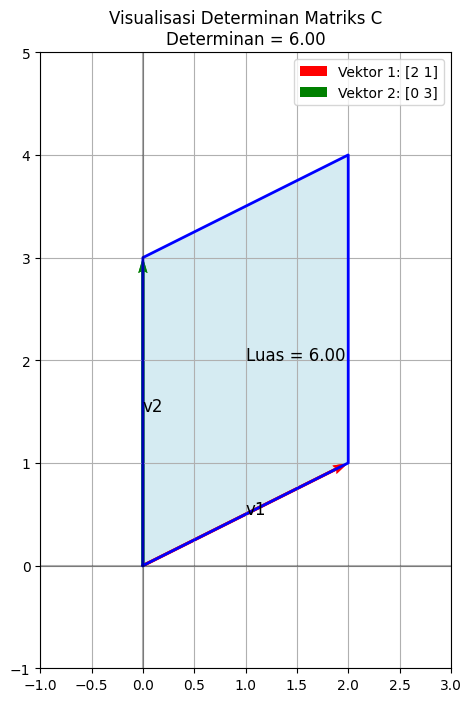

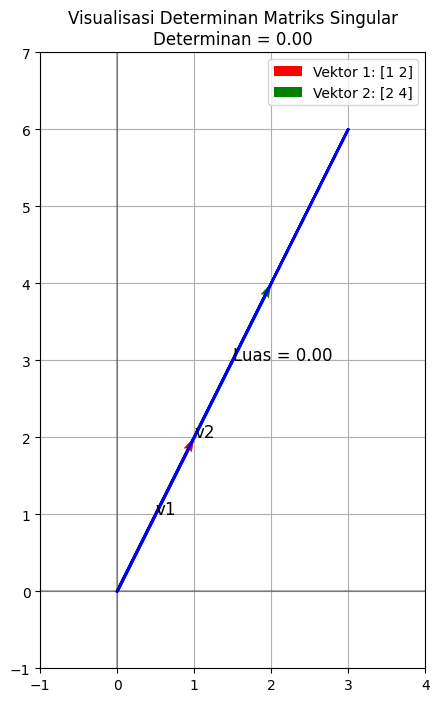

In [19]:
# Menghitung determinan
det_C = np.linalg.det(C)
print("Matriks C =")
print(C)
print("Determinan C =", det_C)
print("Verifikasi manual: 2*3 - 0*1 =", 2*3 - 0*1)

det_D = np.linalg.det(D)
print("\nMatriks D =")
print(D)
print("Determinan D =", det_D)
print("Verifikasi manual: 1*4 - 2*3 =", 1*4 - 2*3)

# Membuat matriks singular (determinan = 0)
singular_matrix = np.array([[1, 2], 
                           [2, 4]])  # Baris kedua = 2 * baris pertama
det_singular = np.linalg.det(singular_matrix)
print("\nMatriks singular =")
print(singular_matrix)
print("Determinan =", det_singular)

# Visualisasi geometris determinan untuk matriks 2×2
# Determinan matriks 2×2 adalah luas parallelogram yang dibentuk oleh 2 vektor kolom/baris
def plot_determinant(matrix, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Origin
    origin = np.array([[0, 0], [0, 0]])
    
    # Vektor kolom dari matriks
    vector1 = matrix[:, 0]
    vector2 = matrix[:, 1]
    
    # Vektor untuk membentuk parallelogram
    vectors = np.column_stack((vector1, vector2, vector1+vector2, origin[0]))
    points = np.array([[0, 0], 
                       vector1, 
                       vector1+vector2, 
                       vector2, 
                       [0, 0]])
    
    # Plot parallelogram
    ax.plot(points[:, 0], points[:, 1], 'b-', linewidth=2)
    ax.fill(points[:, 0], points[:, 1], 'lightblue', alpha=0.5)
    
    # Plot vektor
    ax.quiver(origin[0], origin[1], vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Vektor 1: {vector1}')
    ax.quiver(origin[0], origin[1], vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='g', label=f'Vektor 2: {vector2}')
    
    # Informasi determinan
    det = np.linalg.det(matrix)
    ax.set_title(f'{title}\nDeterminan = {det:.2f}')
    ax.text(vector1[0]/2, vector1[1]/2, f'v1', fontsize=12)
    ax.text(vector2[0]/2, vector2[1]/2, f'v2', fontsize=12)
    ax.text((vector1[0]+vector2[0])/2, (vector1[1]+vector2[1])/2, f'Luas = {abs(det):.2f}', fontsize=12)
    
    # Setting
    ax.set_xlim(min(0, vector1[0], vector2[0], vector1[0]+vector2[0])-1, 
               max(0, vector1[0], vector2[0], vector1[0]+vector2[0])+1)
    ax.set_ylim(min(0, vector1[1], vector2[1], vector1[1]+vector2[1])-1, 
               max(0, vector1[1], vector2[1], vector1[1]+vector2[1])+1)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    ax.legend()
    
    plt.show()

# Visualisasi determinan untuk matriks non-singular
plot_determinant(C, "Visualisasi Determinan Matriks C")

# Visualisasi determinan untuk matriks singular
plot_determinant(singular_matrix, "Visualisasi Determinan Matriks Singular")

## 6. Invers Matriks

Invers dari matriks persegi A adalah matriks A^(-1) sehingga:

$$A \times A^{-1} = A^{-1} \times A = I$$

di mana I adalah matriks identitas.

Matriks memiliki invers jika dan hanya jika determinan tidak sama dengan nol (non-singular).

Untuk matriks 2×2:
$$A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$$

Inversnya adalah:
$$A^{-1} = \frac{1}{\det(A)} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$$

di mana $\det(A) = ad - bc$.

In [20]:
# Menghitung invers matriks
C_inv = np.linalg.inv(C)
print("Matriks C =")
print(C)
print("\nInvers C =")
print(C_inv)

# Verifikasi manual untuk matriks 2×2
det_C = np.linalg.det(C)
C_inv_manual = np.array([
    [C[1, 1], -C[0, 1]],
    [-C[1, 0], C[0, 0]]
]) / det_C
print("\nInvers C (manual) =")
print(C_inv_manual)

# Verifikasi bahwa C × C^(-1) = I
C_times_C_inv = C @ C_inv
print("\nC × C^(-1) =")
print(C_times_C_inv)
print("Apakah sama dengan matriks identitas?", np.allclose(C_times_C_inv, np.eye(2)))

# Mencoba menghitung invers dari matriks singular
singular_matrix = np.array([[1, 2], 
                           [2, 4]])
try:
    singular_inv = np.linalg.inv(singular_matrix)
    print(singular_inv)
except np.linalg.LinAlgError as e:
    print("\nError saat menghitung invers matriks singular:")
    print(e)

# Penggunaan invers matriks untuk menyelesaikan sistem persamaan linear
# Sistem persamaan: 2x + 0y = 8, 1x + 3y = 7
coefficients = C
constants = np.array([8, 7])

# Solusi menggunakan invers: [x, y] = C^(-1) × [8, 7]
solution = C_inv @ constants
print("\nSistem persamaan linear:")
print("2x + 0y = 8")
print("1x + 3y = 7")
print("Solusi: x =", solution[0], ", y =", solution[1])

# Verifikasi solusi
verification = C @ solution
print("Verifikasi: C × [x, y] =", verification)

Matriks C =
[[2 0]
 [1 3]]

Invers C =
[[ 0.5         0.        ]
 [-0.16666667  0.33333333]]

Invers C (manual) =
[[ 0.5         0.        ]
 [-0.16666667  0.33333333]]

C × C^(-1) =
[[1.00000000e+00 0.00000000e+00]
 [2.77555756e-17 1.00000000e+00]]
Apakah sama dengan matriks identitas? True

Error saat menghitung invers matriks singular:
Singular matrix

Sistem persamaan linear:
2x + 0y = 8
1x + 3y = 7
Solusi: x = 4.0 , y = 0.9999999999999998
Verifikasi: C × [x, y] = [8. 7.]


## 7. Trace Matriks

Trace (jejak) dari matriks persegi adalah jumlah dari elemen-elemen pada diagonal utama.

$$\text{trace}(A) = \sum_{i=1}^{n} a_{ii}$$

Beberapa sifat trace:
- trace(A + B) = trace(A) + trace(B)
- trace(cA) = c·trace(A) untuk skalar c
- trace(A×B) = trace(B×A) (meskipun A×B ≠ B×A)

In [21]:
# Menghitung trace matriks
trace_C = np.trace(C)
print("Matriks C =")
print(C)
print("Trace dari C =", trace_C)
print("Verifikasi manual: C[0,0] + C[1,1] =", C[0,0] + C[1,1])

trace_D = np.trace(D)
print("\nMatriks D =")
print(D)
print("Trace dari D =", trace_D)
print("Verifikasi manual: D[0,0] + D[1,1] =", D[0,0] + D[1,1])

# Sifat trace(A+B) = trace(A) + trace(B)
trace_C_plus_D = np.trace(C + D)
print("\ntrace(C + D) =", trace_C_plus_D)
print("trace(C) + trace(D) =", trace_C + trace_D)
print("Apakah trace(C+D) = trace(C) + trace(D)?", trace_C_plus_D == trace_C + trace_D)

# Sifat trace(A×B) = trace(B×A)
CD = C @ D
DC = D @ C
trace_CD = np.trace(CD)
trace_DC = np.trace(DC)
print("\nMatriks C×D =")
print(CD)
print("trace(C×D) =", trace_CD)
print("\nMatriks D×C =")
print(DC)
print("trace(D×C) =", trace_DC)
print("Apakah trace(C×D) = trace(D×C)?", trace_CD == trace_DC)

Matriks C =
[[2 0]
 [1 3]]
Trace dari C = 5
Verifikasi manual: C[0,0] + C[1,1] = 5

Matriks D =
[[1 2]
 [3 4]]
Trace dari D = 5
Verifikasi manual: D[0,0] + D[1,1] = 5

trace(C + D) = 10
trace(C) + trace(D) = 10
Apakah trace(C+D) = trace(C) + trace(D)? True

Matriks C×D =
[[ 2  4]
 [10 14]]
trace(C×D) = 16

Matriks D×C =
[[ 4  6]
 [10 12]]
trace(D×C) = 16
Apakah trace(C×D) = trace(D×C)? True


## 8. Dekomposisi Matriks

Dekomposisi matriks adalah teknik memecah matriks menjadi beberapa komponen yang lebih sederhana. Beberapa dekomposisi matriks yang sering digunakan:

1. **Dekomposisi LU**: Memecah matriks A menjadi matriks segitiga bawah (L) dan segitiga atas (U) sehingga A = L×U.
2. **Dekomposisi QR**: Memecah matriks A menjadi matriks ortogonal (Q) dan matriks segitiga atas (R) sehingga A = Q×R.
3. **Dekomposisi Nilai Singular (SVD)**: Memecah matriks A menjadi A = U×Σ×V^T, di mana U dan V adalah matriks ortogonal dan Σ adalah matriks diagonal.

Dekomposisi matriks sangat penting dalam machine learning untuk:
- Menyelesaikan sistem persamaan linear secara efisien
- Reduksi dimensi (PCA)
- Inversi matriks numerik stabil
- Kompresi data

In [22]:
# Dekomposisi LU
from scipy.linalg import lu

# Buat matriks untuk dekomposisi
A = np.array([[4, 3], 
              [6, 3]])

# Lakukan dekomposisi LU
P, L, U = lu(A)
print("Matriks A =")
print(A)
print("\nMatriks L (segitiga bawah) =")
print(L)
print("\nMatriks U (segitiga atas) =")
print(U)
print("\nMatriks permutasi P =")
print(P)

# Verifikasi: P^(-1)×L×U = A
PLU = P.T @ L @ U  # P.T adalah invers matriks permutasi
print("\nVerifikasi P.T×L×U =")
print(PLU)
print("Apakah P.T×L×U = A?", np.allclose(PLU, A))

# Dekomposisi QR
from scipy.linalg import qr

Q, R = qr(A)
print("\n--- Dekomposisi QR ---")
print("Matriks Q (ortogonal) =")
print(Q)
print("\nMatriks R (segitiga atas) =")
print(R)

# Verifikasi Q×R = A
QR = Q @ R
print("\nVerifikasi Q×R =")
print(QR)
print("Apakah Q×R = A?", np.allclose(QR, A))

# Verifikasi bahwa Q adalah matriks ortogonal (Q^T×Q = I)
QTQ = Q.T @ Q
print("\nVerifikasi Q^T×Q =")
print(QTQ)
print("Apakah Q^T×Q = I?", np.allclose(QTQ, np.eye(2)))

# Dekomposisi Nilai Singular (SVD)
U, S, VT = np.linalg.svd(A)
print("\n--- Dekomposisi SVD ---")
print("Matriks U =")
print(U)
print("\nNilai singular (diagonal dari Σ) =")
print(S)
print("\nMatriks V^T =")
print(VT)

# Membuat matriks diagonal Σ
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, S)
print("\nMatriks Σ =")
print(Sigma)

# Verifikasi U×Σ×V^T = A
USV = U @ Sigma @ VT
print("\nVerifikasi U×Σ×V^T =")
print(USV)
print("Apakah U×Σ×V^T = A?", np.allclose(USV, A))

Matriks A =
[[4 3]
 [6 3]]

Matriks L (segitiga bawah) =
[[1.         0.        ]
 [0.66666667 1.        ]]

Matriks U (segitiga atas) =
[[6. 3.]
 [0. 1.]]

Matriks permutasi P =
[[0. 1.]
 [1. 0.]]

Verifikasi P.T×L×U =
[[4. 3.]
 [6. 3.]]
Apakah P.T×L×U = A? True

--- Dekomposisi QR ---
Matriks Q (ortogonal) =
[[-0.5547002  -0.83205029]
 [-0.83205029  0.5547002 ]]

Matriks R (segitiga atas) =
[[-7.21110255 -4.16025147]
 [ 0.         -0.83205029]]

Verifikasi Q×R =
[[4. 3.]
 [6. 3.]]
Apakah Q×R = A? True

Verifikasi Q^T×Q =
[[ 1.0000000e+00 -1.0499512e-17]
 [-1.0499512e-17  1.0000000e+00]]
Apakah Q^T×Q = I? True

--- Dekomposisi SVD ---
Matriks U =
[[-0.59581566 -0.80312122]
 [-0.80312122  0.59581566]]

Nilai singular (diagonal dari Σ) =
[8.33557912 0.71980602]

Matriks V^T =
[[-0.86400595 -0.50348159]
 [ 0.50348159 -0.86400595]]

Matriks Σ =
[[8.33557912 0.        ]
 [0.         0.71980602]]

Verifikasi U×Σ×V^T =
[[4. 3.]
 [6. 3.]]
Apakah U×Σ×V^T = A? True


## 9. Nilai dan Vektor Eigen

Nilai eigen (eigenvalue) λ dari matriks persegi A adalah nilai skalar di mana terdapat vektor non-nol v (vektor eigen) yang memenuhi persamaan:

$$A \vec{v} = \lambda \vec{v}$$

Secara intuitif, vektor eigen adalah vektor yang ketika dikalikan dengan matriks A, arahnya tetap sama dan hanya berubah skalanya dengan faktor λ.

Nilai dan vektor eigen memiliki berbagai aplikasi dalam machine learning:
- Reduksi dimensi (PCA)
- Analisis spektral graf
- Analisis stabilitas sistem
- Metode kuadratik (quadratic methods)

Matriks D =
[[1 2]
 [3 4]]

Nilai eigen = [-0.37228132  5.37228132]

Vektor eigen (sebagai kolom) =
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]

Verifikasi untuk λ₁ = -0.3722813232690143
D×v₁ = [ 0.30697009 -0.21062466]
λ₁×v₁ = [ 0.30697009 -0.21062466]
Apakah D×v₁ = λ₁×v₁? True

Verifikasi untuk λ₂ = 5.372281323269014
D×v₂ = [-2.23472698 -4.88542751]
λ₂×v₂ = [-2.23472698 -4.88542751]
Apakah D×v₂ = λ₂×v₂? True


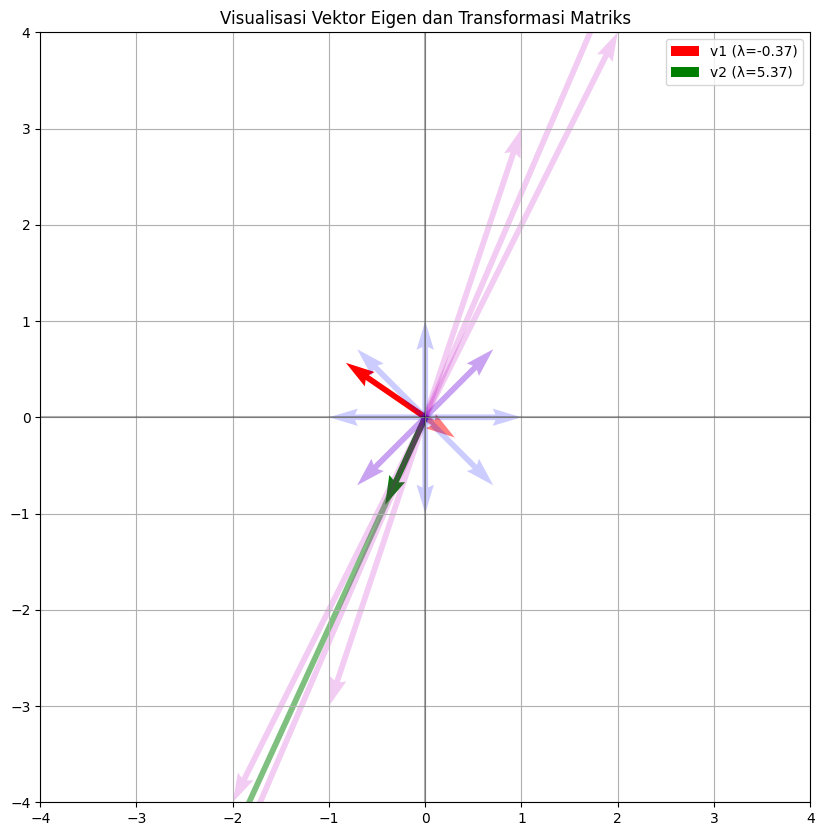

In [23]:
# Menghitung nilai dan vektor eigen
D = np.array([[1, 2], 
              [3, 4]])

eigenvalues, eigenvectors = np.linalg.eig(D)
print("Matriks D =")
print(D)
print("\nNilai eigen =", eigenvalues)
print("\nVektor eigen (sebagai kolom) =")
print(eigenvectors)

# Verifikasi D×v = λ×v untuk pasangan pertama
lambda1 = eigenvalues[0]
v1 = eigenvectors[:, 0]
Dv1 = D @ v1
lambda_v1 = lambda1 * v1

print("\nVerifikasi untuk λ₁ =", lambda1)
print("D×v₁ =", Dv1)
print("λ₁×v₁ =", lambda_v1)
print("Apakah D×v₁ = λ₁×v₁?", np.allclose(Dv1, lambda_v1))

# Verifikasi D×v = λ×v untuk pasangan kedua
lambda2 = eigenvalues[1]
v2 = eigenvectors[:, 1]
Dv2 = D @ v2
lambda_v2 = lambda2 * v2

print("\nVerifikasi untuk λ₂ =", lambda2)
print("D×v₂ =", Dv2)
print("λ₂×v₂ =", lambda_v2)
print("Apakah D×v₂ = λ₂×v₂?", np.allclose(Dv2, lambda_v2))

# Visualisasi vektor eigen
def plot_eigenvectors(matrix, eigenvalues, eigenvectors):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Grid
    grid_range = 4
    ax.set_xlim(-grid_range, grid_range)
    ax.set_ylim(-grid_range, grid_range)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Plot vektor eigen
    origin = np.zeros(2)
    colors = ['r', 'g']
    
    for i in range(len(eigenvalues)):
        # Normalisasi vektor eigen
        v = eigenvectors[:, i]
        v_normalized = v / np.linalg.norm(v)
        
        # Plot vektor eigen (normalisasi)
        ax.quiver(origin[0], origin[1], v_normalized[0], v_normalized[1], 
                 angles='xy', scale_units='xy', scale=1, color=colors[i], 
                 label=f'v{i+1} (λ={eigenvalues[i]:.2f})')
        
        # Plot hasil transformasi matriks
        transformed = matrix @ v_normalized
        ax.quiver(origin[0], origin[1], transformed[0], transformed[1], 
                 angles='xy', scale_units='xy', scale=1, 
                 color=colors[i], alpha=0.5, linestyle='--')
        
    # Plot beberapa vektor acak dan transformasinya
    n_vectors = 8
    thetas = np.linspace(0, 2*np.pi, n_vectors, endpoint=False)
    for theta in thetas:
        v = np.array([np.cos(theta), np.sin(theta)])
        transformed = matrix @ v
        
        ax.quiver(origin[0], origin[1], v[0], v[1], 
                 angles='xy', scale_units='xy', scale=1, 
                 color='b', alpha=0.2)
        ax.quiver(origin[0], origin[1], transformed[0], transformed[1], 
                 angles='xy', scale_units='xy', scale=1, 
                 color='m', alpha=0.2)
    
    ax.legend()
    ax.set_title('Visualisasi Vektor Eigen dan Transformasi Matriks')
    plt.show()

# Visualisasi
plot_eigenvectors(D, eigenvalues, eigenvectors)

## 10. Rank Matriks

Rank dari matriks adalah dimensi dari ruang vektor yang direntang oleh vektor-vektor baris atau kolomnya. Secara praktis, rank matriks adalah:
- Jumlah baris (atau kolom) yang linear independen
- Jumlah nilai singular yang tidak nol
- Dimensi dari ruang baris (atau ruang kolom)

Rank memberikan informasi penting:
- Jika rank = min(m, n) untuk matriks m×n, maka matriks memiliki rank penuh (full rank)
- Jika rank < min(m, n), maka matriks memiliki rank tidak penuh (rank-deficient)
- Untuk matriks persegi n×n, jika rank < n, maka determinan = 0 dan matriks tidak memiliki invers

In [24]:
# Menghitung rank matriks
A = np.array([[1, 2, 3],
              [4, 5, 6]])  # Matriks 2×3

rank_A = np.linalg.matrix_rank(A)
print("Matriks A =")
print(A)
print("Rank dari A =", rank_A)
print("Full rank?", rank_A == min(A.shape))

# Matriks rank-deficient (rank tidak penuh)
B = np.array([[1, 2, 3],
              [2, 4, 6]])  # Baris kedua = 2 * baris pertama

rank_B = np.linalg.matrix_rank(B)
print("\nMatriks B (rank-deficient) =")
print(B)
print("Rank dari B =", rank_B)
print("Full rank?", rank_B == min(B.shape))

# Matriks full-rank
C = np.array([[2, 0],
              [1, 3]])  # Matriks 2×2 full-rank

rank_C = np.linalg.matrix_rank(C)
print("\nMatriks C (full-rank) =")
print(C)
print("Rank dari C =", rank_C)
print("Full rank?", rank_C == min(C.shape))

# Matriks singular (determinan = 0)
singular = np.array([[1, 2],
                     [2, 4]])  # Matriks singular 2×2 

rank_singular = np.linalg.matrix_rank(singular)
print("\nMatriks singular =")
print(singular)
print("Rank =", rank_singular)
print("Full rank?", rank_singular == min(singular.shape))
print("Determinan =", np.linalg.det(singular))

# Menghitung rank dengan SVD
U, S, VT = np.linalg.svd(A)
rank_from_svd = np.sum(S > 1e-10)  # Hitung jumlah nilai singular yang tidak nol (diatas threshold numerik)
print("\nNilai singular dari A:", S)
print("Rank dari A (dari nilai singular) =", rank_from_svd)

Matriks A =
[[1 2 3]
 [4 5 6]]
Rank dari A = 2
Full rank? True

Matriks B (rank-deficient) =
[[1 2 3]
 [2 4 6]]
Rank dari B = 1
Full rank? False

Matriks C (full-rank) =
[[2 0]
 [1 3]]
Rank dari C = 2
Full rank? True

Matriks singular =
[[1 2]
 [2 4]]
Rank = 1
Full rank? False
Determinan = 0.0

Nilai singular dari A: [9.508032   0.77286964]
Rank dari A (dari nilai singular) = 2


## Aplikasi dalam Machine Learning

Operasi matriks dasar memiliki banyak aplikasi dalam algoritma machine learning. Berikut beberapa contoh:

### 1. Regresi Linear

Dalam regresi linear, kita mencari koefisien β yang meminimalkan error kuadrat:

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

di mana X adalah matriks data dan y adalah vektor target.

### 2. PCA (Principal Component Analysis)

PCA menggunakan dekomposisi nilai singular (SVD) atau analisis nilai eigen untuk mereduksi dimensi data dengan mempertahankan variansi maksimum.

### 3. Transformasi Data

Operasi matriks digunakan untuk transformasi, normalisasi, dan preprocessing data.

Koefisien regresi linear:
Intercept (β₀) = 3.2151
Slope (β₁) = 1.9540
True model: y = 2*x + 3


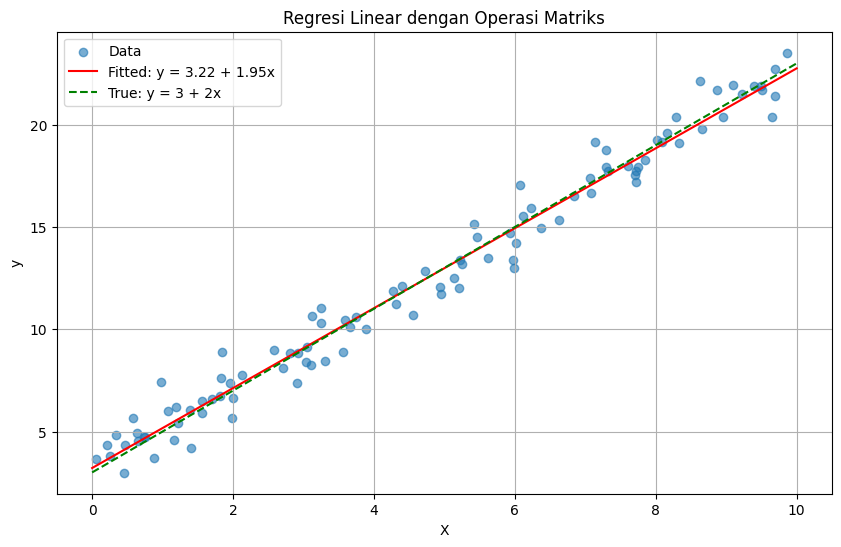


Matriks kovarians:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Nilai eigen (variansi komponen):
[4.22824171 0.24267075 0.0782095  0.02383509]

Proposi variansi yang dijelaskan setiap komponen:
[0.92461872 0.05306648 0.01710261 0.00521218]


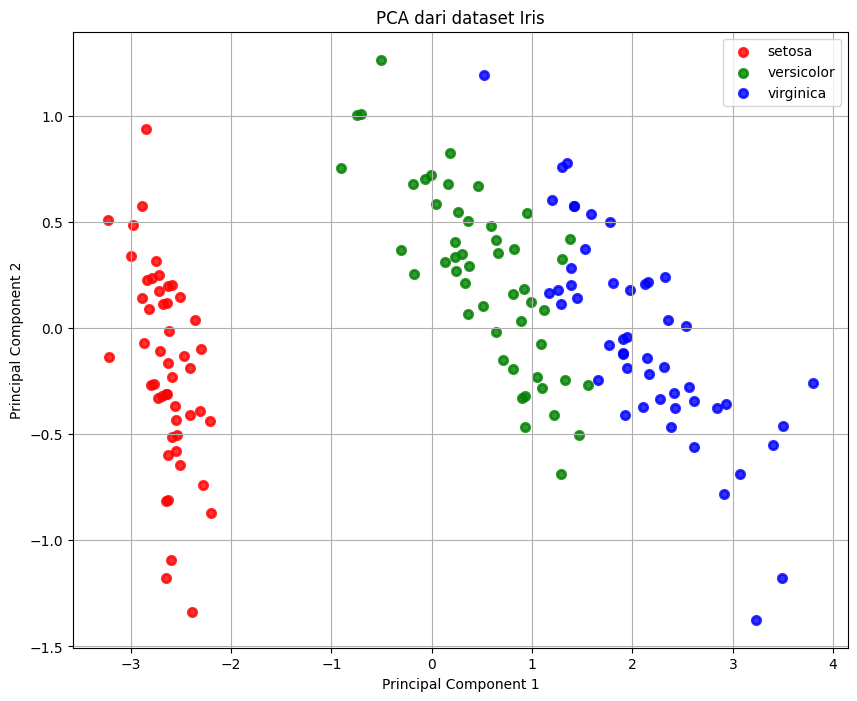


Data asli (beberapa sampel pertama):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Data standarisasi (beberapa sampel pertama):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Mean data standarisasi:
[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]

Standar deviasi data standarisasi:
[1. 1. 1. 1.]


In [25]:
# Contoh Aplikasi 1: Regresi Linear dengan Operasi Matriks
np.random.seed(42)
# Buat data sintetis
X = np.random.rand(100, 1) * 10  # Feature (100 sampel, 1 fitur)
y = 2 * X.squeeze() + 3 + np.random.randn(100)  # Target dengan noise

# Tambahkan kolom untuk bias (intercept)
X_design = np.column_stack((np.ones(X.shape[0]), X))

# Solusi regresi linear dengan closed-form
# β = (X^T X)^(-1) X^T y
X_transpose_X = X_design.T @ X_design
X_transpose_y = X_design.T @ y
beta = np.linalg.inv(X_transpose_X) @ X_transpose_y

print("Koefisien regresi linear:")
print(f"Intercept (β₀) = {beta[0]:.4f}")
print(f"Slope (β₁) = {beta[1]:.4f}")
print(f"True model: y = 2*x + 3")

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Data')
x_range = np.array([0, 10])
plt.plot(x_range, beta[0] + beta[1] * x_range, 'r-', 
         label=f'Fitted: y = {beta[0]:.2f} + {beta[1]:.2f}x')
plt.plot(x_range, 3 + 2 * x_range, 'g--', label='True: y = 3 + 2x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresi Linear dengan Operasi Matriks')
plt.legend()
plt.grid(True)
plt.show()

# Contoh Aplikasi 2: PCA Sederhana dengan Operasi Matriks
from sklearn import datasets

# Load dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Menghitung mean dan mengurangi dari data
X_centered = X - X.mean(axis=0)

# Menghitung matriks kovarians
cov_matrix = (X_centered.T @ X_centered) / (X.shape[0] - 1)
print("\nMatriks kovarians:")
print(cov_matrix)

# Menghitung nilai eigen dan vektor eigen dari matriks kovarians
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Urutkan nilai eigen dan vektor eigen (dari besar ke kecil)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nNilai eigen (variansi komponen):")
print(eigenvalues)

print("\nProposi variansi yang dijelaskan setiap komponen:")
print(eigenvalues / eigenvalues.sum())

# Proyeksikan data ke 2 komponen utama
PC = X_centered @ eigenvectors[:, :2]

# Plot hasil PCA
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
target_names = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(PC[y == i, 0], PC[y == i, 1], color=color, alpha=0.8, lw=2,
                label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA dari dataset Iris')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Contoh Aplikasi 3: Transformasi Data
# Standarisasi data dengan operasi matriks
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

# Standarisasi: (X - mean) / std
X_standardized = (X - X_mean) / X_std

print("\nData asli (beberapa sampel pertama):")
print(X[:5])

print("\nData standarisasi (beberapa sampel pertama):")
print(X_standardized[:5])

print("\nMean data standarisasi:")
print(X_standardized.mean(axis=0))

print("\nStandar deviasi data standarisasi:")
print(X_standardized.std(axis=0))

## Kesimpulan

Dalam notebook ini, kita telah mempelajari berbagai operasi matriks dasar yang sangat penting dalam machine learning:
- Penjumlahan dan pengurangan matriks
- Perkalian matriks dan perkalian elemen per elemen
- Transposisi matriks
- Determinan dan sifat-sifatnya
- Invers matriks dan aplikasinya
- Trace matriks
- Berbagai dekomposisi matriks (LU, QR, SVD)
- Nilai dan vektor eigen
- Rank matriks
- Aplikasi operasi matriks dalam regresi linear, PCA, dan transformasi data

Pemahaman yang kuat tentang operasi matriks dasar ini akan membantu kita memahami algoritma machine learning yang lebih kompleks, karena sebagian besar algoritma tersebut dibangun berdasarkan operasi-operasi matriks ini.

## Latihan

1. Buat matriks 3×3 A dan hitung determinan, invers, dan trace-nya.
2. Buat dua matriks kompatibel dan verifikasi sifat distribusi perkalian matriks: A(B+C) = AB + AC.
3. Implementasikan regresi ridge dengan formula: $\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y$, di mana λ adalah parameter regularisasi.
4. Buat matriks singular dan coba tunjukkan bahwa determinannya 0 dan tidak memiliki invers.

In [26]:
# Latihan 1: Matriks 3×3
A = np.array([[4, 1, 2],
              [3, 5, 6],
              [7, 8, 9]])

# Determinan
det_A = np.linalg.det(A)
print("Matriks A =")
print(A)
print("\nDeterminan A =", det_A)

# Invers (jika determinan tidak nol)
if abs(det_A) > 1e-10:  # Toleransi numerik kecil
    A_inv = np.linalg.inv(A)
    print("\nInvers A =")
    print(A_inv)
    
    # Verifikasi A×A^(-1) = I
    print("\nA×A^(-1) =")
    print(A @ A_inv)
else:
    print("\nMatriks A singular, tidak punya invers")

# Trace
trace_A = np.trace(A)
print("\nTrace A =", trace_A)

# Latihan 2: Sifat distribusi perkalian matriks
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])
C = np.array([[9, 10],
             [11, 12]])

# Hitung A(B+C)
B_plus_C = B + C
A_BC = A @ B_plus_C
print("\n\nVerifikasi sifat distribusi perkalian matriks:")
print("A =")
print(A)
print("\nB =")
print(B)
print("\nC =")
print(C)
print("\nA(B+C) =")
print(A_BC)

# Hitung AB + AC
AB = A @ B
AC = A @ C
AB_plus_AC = AB + AC
print("\nAB + AC =")
print(AB_plus_AC)

print("\nApakah A(B+C) = AB + AC?", np.array_equal(A_BC, AB_plus_AC))

# Latihan 3: Regresi Ridge
np.random.seed(42)
# Buat data sintetis
X = np.random.rand(100, 3) * 10  # 100 sampel, 3 fitur
true_betas = np.array([2, -1, 0.5])  # Koefisien sebenarnya
y = X @ true_betas + 3 + np.random.randn(100) * 2  # Target dengan noise

# Tambahkan kolom untuk bias (intercept)
X_design = np.column_stack((np.ones(X.shape[0]), X))

# Implementasi regresi ridge
def ridge_regression(X, y, lambda_reg):
    """
    Implementasi regresi ridge dengan operasi matriks
    
    β = (X^T X + λI)^(-1) X^T y
    """
    n_features = X.shape[1]
    
    # Buat matriks identitas
    I = np.eye(n_features)
    
    # Hitung (X^T X + λI)^(-1) X^T y
    XTX = X.T @ X
    reg_term = XTX + lambda_reg * I
    inv_term = np.linalg.inv(reg_term)
    XTy = X.T @ y
    
    return inv_term @ XTy

# Cobalah beberapa nilai lambda
lambdas = [0, 0.1, 1, 10, 100]
print("\n\nRegresi Ridge dengan berbagai nilai lambda:")
for lambda_reg in lambdas:
    beta_ridge = ridge_regression(X_design, y, lambda_reg)
    print(f"\nλ = {lambda_reg}:")
    print(f"  Intercept (β₀) = {beta_ridge[0]:.4f}")
    print(f"  β₁ = {beta_ridge[1]:.4f} (true: 2)")
    print(f"  β₂ = {beta_ridge[2]:.4f} (true: -1)")
    print(f"  β₃ = {beta_ridge[3]:.4f} (true: 0.5)")

# Latihan 4: Matriks singular
singular_matrix = np.array([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]])  # Rank 2 (baris 3 adalah kombinasi linear baris 1 dan 2)

det_singular = np.linalg.det(singular_matrix)
rank_singular = np.linalg.matrix_rank(singular_matrix)

print("\n\nMatriks singular:")
print(singular_matrix)
print("Determinan =", det_singular)
print("Rank =", rank_singular)
print("Full rank?", rank_singular == min(singular_matrix.shape))

try:
    inv_singular = np.linalg.inv(singular_matrix)
    print("Invers =")
    print(inv_singular)
except np.linalg.LinAlgError as e:
    print("Error saat menghitung invers:", e)

Matriks A =
[[4 1 2]
 [3 5 6]
 [7 8 9]]

Determinan A = -18.99999999999999

Invers A =
[[ 0.15789474 -0.36842105  0.21052632]
 [-0.78947368 -1.15789474  0.94736842]
 [ 0.57894737  1.31578947 -0.89473684]]

A×A^(-1) =
[[ 1.00000000e+00  4.44089210e-16 -2.22044605e-16]
 [ 0.00000000e+00  1.00000000e+00 -6.66133815e-16]
 [-2.22044605e-16  2.22044605e-16  1.00000000e+00]]

Trace A = 18


Verifikasi sifat distribusi perkalian matriks:
A =
[[1 2]
 [3 4]]

B =
[[5 6]
 [7 8]]

C =
[[ 9 10]
 [11 12]]

A(B+C) =
[[ 50  56]
 [114 128]]

AB + AC =
[[ 50  56]
 [114 128]]

Apakah A(B+C) = AB + AC? True


Regresi Ridge dengan berbagai nilai lambda:

λ = 0:
  Intercept (β₀) = 2.4700
  β₁ = 2.0556 (true: 2)
  β₂ = -1.0316 (true: -1)
  β₃ = 0.6141 (true: 0.5)

λ = 0.1:
  Intercept (β₀) = 2.4469
  β₁ = 2.0568 (true: 2)
  β₂ = -1.0302 (true: -1)
  β₃ = 0.6156 (true: 0.5)

λ = 1:
  Intercept (β₀) = 2.2580
  β₁ = 2.0669 (true: 2)
  β₂ = -1.0187 (true: -1)
  β₃ = 0.6282 (true: 0.5)

λ = 10:
  Intercept (β₀) =